In [1]:
import numpy as np

csv_path = r"..\mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [2]:
fuji[130:140]

array([[  130.      ,    35.352505,   138.756638,  2563.4     ,
        41888.      ],
       [  131.      ,    35.35418 ,   138.753742,  2703.1     ,
        42210.      ],
       [  132.      ,    35.355855,   138.750846,  2825.55    ,
        42532.      ],
       [  133.      ,    35.35753 ,   138.74795 ,  2967.9     ,
        42854.      ],
       [  134.      ,    35.359205,   138.745054,  3087.81    ,
        43177.      ],
       [  135.      ,    35.36088 ,   138.742157,  3266.24    ,
        43499.      ],
       [  136.      ,    35.362555,   138.739261,  3434.59    ,
        43821.      ],
       [  137.      ,    35.36423 ,   138.736364,  3600.08    ,
        44143.      ],
       [  138.      ,    35.365904,   138.733468,  3679.96    ,
        44466.      ],
       [  139.      ,    35.367579,   138.730571,  3664.9     ,
        44788.      ]])

## Problem 1
**Data Visualisation**

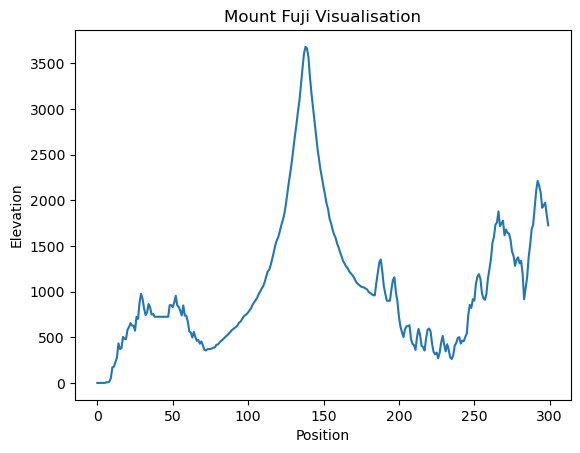

In [3]:
import matplotlib.pyplot as plt
plt.title("Mount Fuji Visualisation")
plt.xlabel("Position")
plt.ylabel("Elevation")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

## Problem 2
**Function to Calculate Gradient at a Certain Point**

In [4]:
def gradient_at_point(point, data=fuji):
    """
    Parameters:
    data: this is the numpy array containing the data. default is fuji
    point: the point to calculate the gradient at
    
    Returns:
    gradient: the gradient at point
    """
    change_in_x = point - (point-1)
    change_in_y = data[point,3] - data[point-1,3]
    
    gradient = change_in_y/change_in_x
    return gradient
   
print(f"The gradient at point 147 is {gradient_at_point(point=147)}")

The gradient at point 147 is -116.36999999999989


## Problem 3
**Function to Calculate Destination Point**

In [31]:
def destination_point(current_point, data=fuji, alpha=0.2):
    """
    Parameters
    current_point: the current point
    
    Returns
    dest_point: The next point to go to based on the slope of the current point
    dest_gradient: The gradient at dest_point
    """
    #define variables
    # Compute the gradient of the current point
    current_point_gradient = gradient_at_point(current_point)
    
    dest_point = current_point - (alpha * current_point_gradient)
    dest_point = round(dest_point)
    
    if dest_point<=0 or dest_point>=len(data):
        dest_gradient = None
    else:
        dest_gradient = gradient_at_point(dest_point)
    return dest_point, dest_gradient

print(f"The next point to go to after point {75} is {destination_point(75)[0]} and the gradient is {destination_point(75)[1]}")

The next point to go to after point 75 is 75 and the gradient is 0.14999999999997726


## Problem 4
**Function to go Down the Mountain**

In [66]:
def go_down(alpha=0.2):
    """    
    Returns
    points_list: a list showing the points for each move"""
    starting_point=136
    points_list = [starting_point]
    
    while True:
        next_point, next_gradient = destination_point(starting_point, alpha=alpha)
        
        # Check that you have gone down the mountain
        if next_point==starting_point or next_point in points_list or next_point<=0 or next_point>=300:
            break
        starting_point = next_point
        points_list.append(starting_point)
            
    return points_list
    
go_down()

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

## Problem 5
**Visualisation of Descent Process**

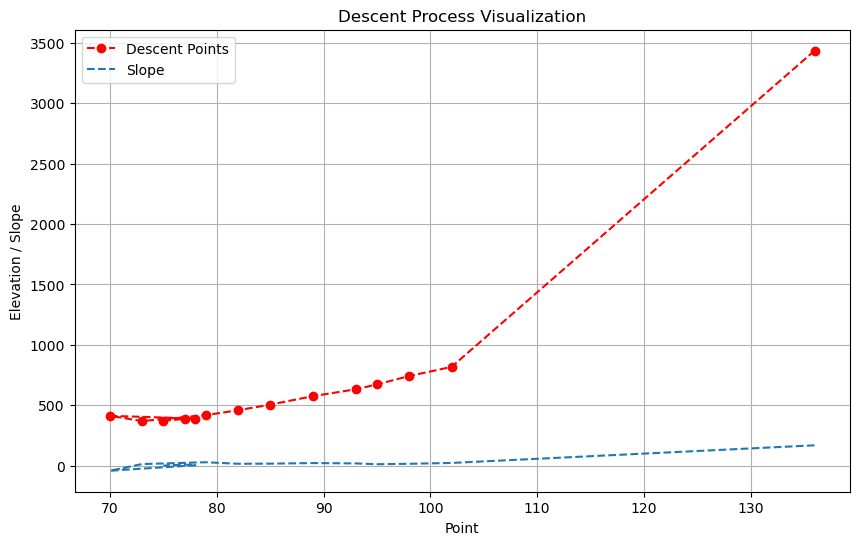

In [53]:
descent_path = go_down()

# Extract data for visualization
elevation_data = fuji[:, 3]
slope_data = [gradient_at_point(point, fuji) for point in descent_path]

# Plotting
plt.figure(figsize=(10, 6))

# Plot points moved in the cross-section as dots
plt.plot(descent_path, elevation_data[descent_path], 'ro', linestyle='dashed', label='Descent Points')

# Make a line graph of altitude and slope for each repetition
plt.plot(descent_path, slope_data, label='Slope', linestyle='dashed')

plt.title("Descent Process Visualization")
plt.xlabel("Point")
plt.ylabel("Elevation / Slope")
plt.legend()
plt.grid(True)
plt.show()

## Problem 6
**Change of Initial Values**

In [67]:
def go_down(starting_point, alpha=0.2):
    """ 
    Parameters
    starting_point: The point to start descending from
    
    Returns
    points_list: a list showing the points for each move"""
    points_list = [starting_point]
    
    while True:
        next_point, next_gradient = destination_point(starting_point, alpha=alpha)
        
        # Check that you have gone down the mountain
        if next_point==starting_point or next_point in points_list or next_point<=0 or next_point>=300:
            break
        starting_point = next_point
        points_list.append(starting_point)
            
    return points_list
    
go_down(200)

[200, 234, 251, 215, 239, 228, 206, 205, 198, 231, 247, 226]

In [68]:
go_down(289)

[289, 279, 274, 288, 254, 263, 249, 230]

In [69]:
go_down(132)

[132, 108, 103, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

In [70]:
go_down(97)

[97, 92, 90, 87, 84, 81, 77, 75]

## Problem 7
**Visulaisation Process for Each Initial Value

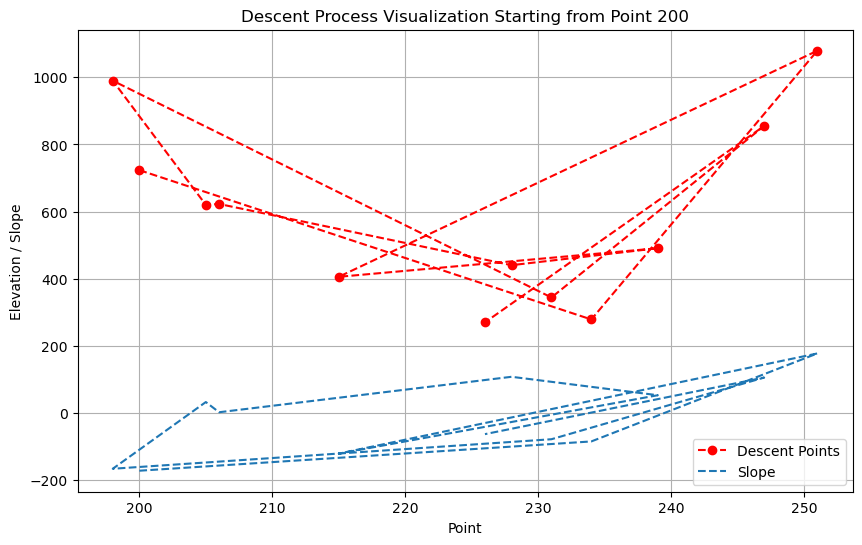

In [71]:
def visualise_descent(starting_point, data=fuji, alpha=0.2):
    descending_path = go_down(starting_point, alpha=alpha)
    
    elevation_data = data[:, 3]
    slope_data = [gradient_at_point(point, data) for point in descending_path]

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot points moved in the cross-section as dots
    plt.plot(descending_path, elevation_data[descending_path], 'ro', linestyle='dashed', label='Descent Points')

    # Make a line graph of altitude and slope for each repetition
    plt.plot(descending_path, slope_data, label='Slope', linestyle='dashed')

    plt.title(f"Descent Process Visualization Starting from Point {starting_point}")
    plt.xlabel("Point")
    plt.ylabel("Elevation / Slope")
    plt.legend()
    plt.grid(True)
    plt.show()

visualise_descent(200)

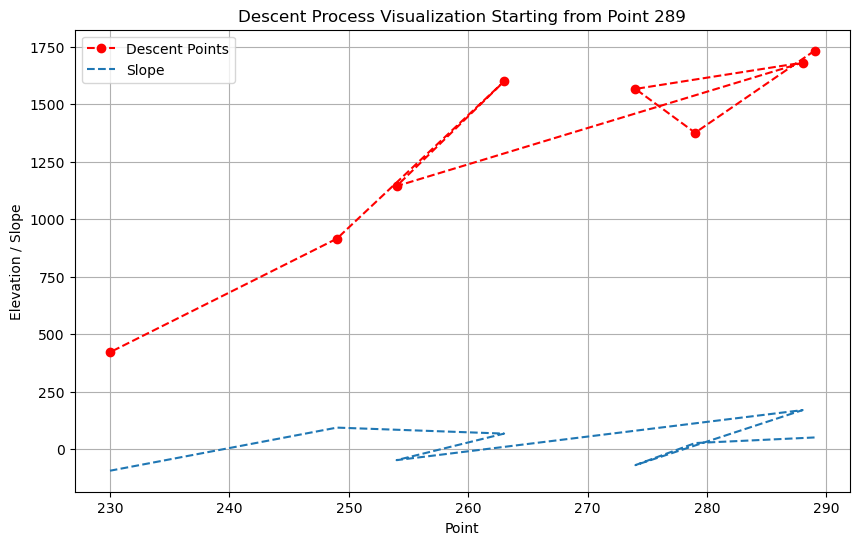

In [72]:
visualise_descent(289)

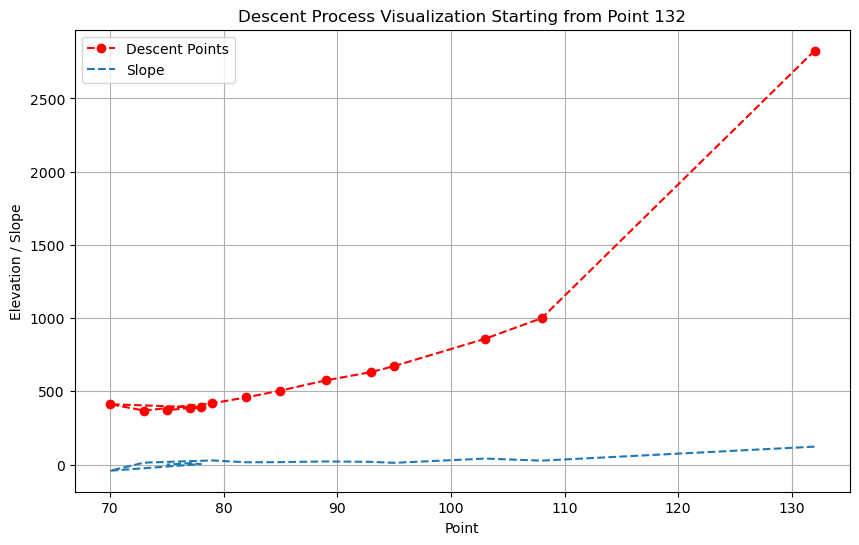

In [73]:
visualise_descent(132)

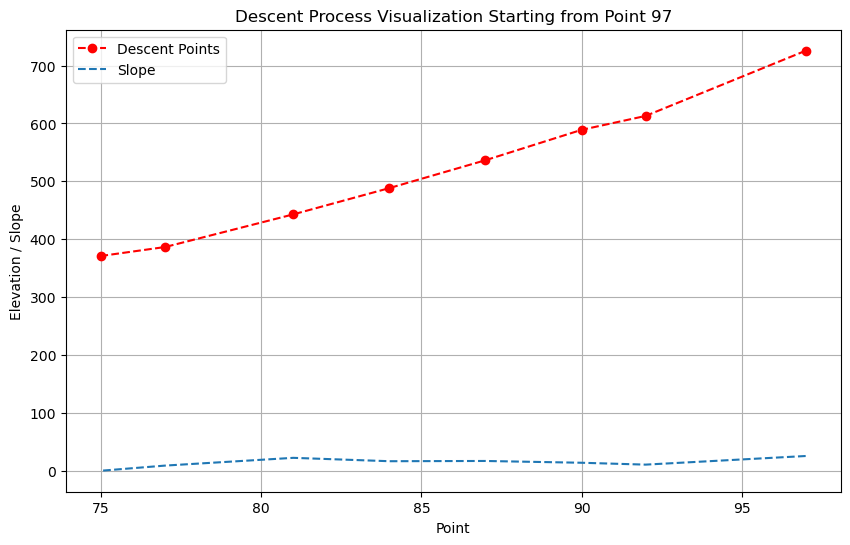

In [74]:
visualise_descent(97)

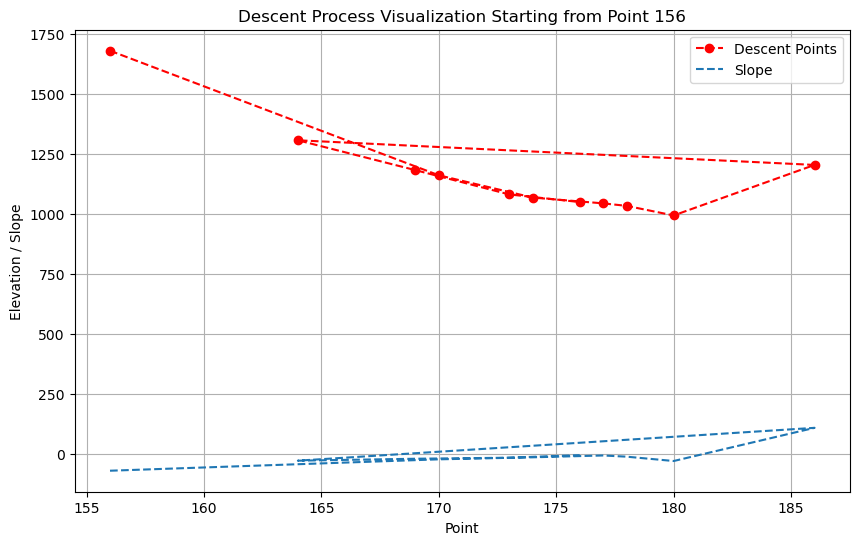

In [75]:
visualise_descent(156)

## Problem 8
**Hyperparameter Changes**

Descent from point 136 when alpha is 0.2

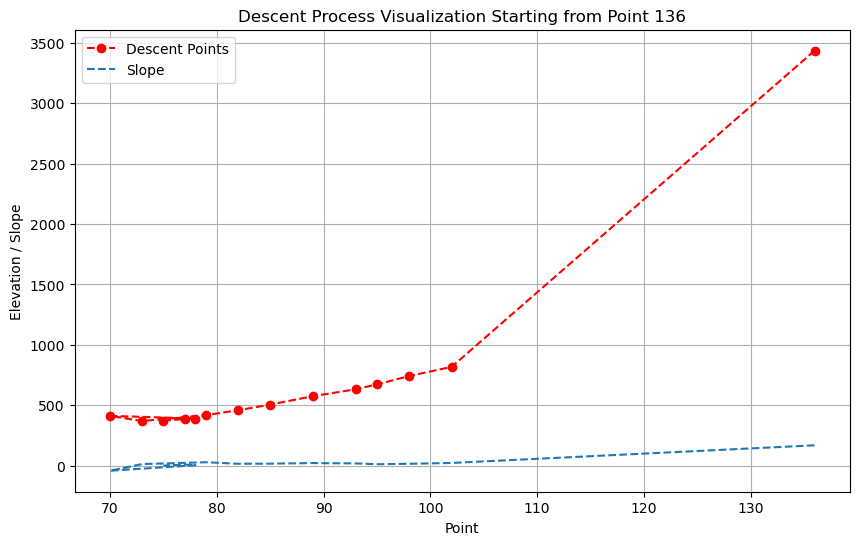

In [76]:
visualise_descent(136, alpha=0.2)

Descent from point 136 when alpha is 0.5

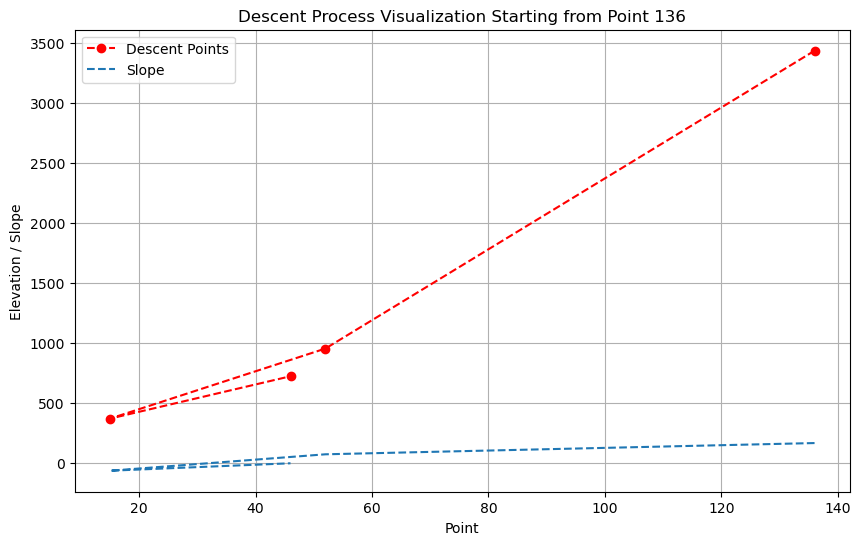

In [82]:
visualise_descent(136, alpha=0.5)

Descent from point 200 when alpha is 0.2

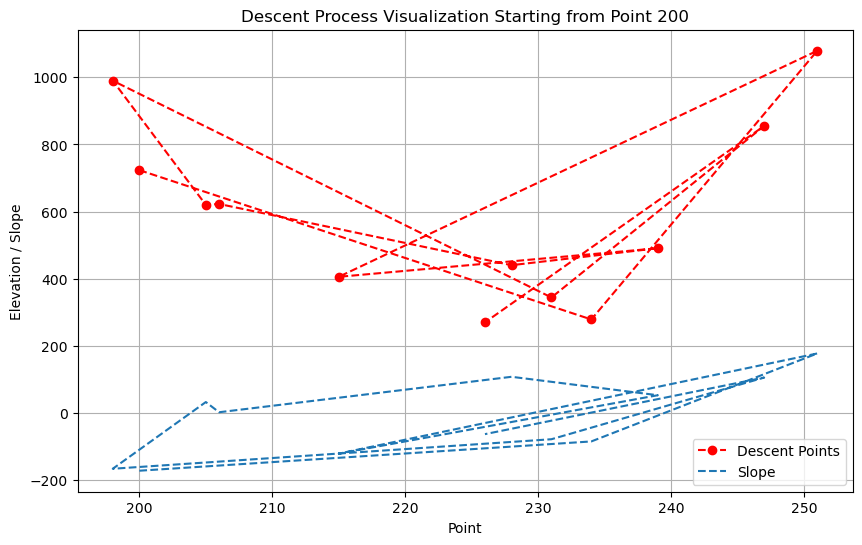

In [84]:
visualise_descent(200, alpha=0.2)

Descent from point 200 when alpha is 0.5

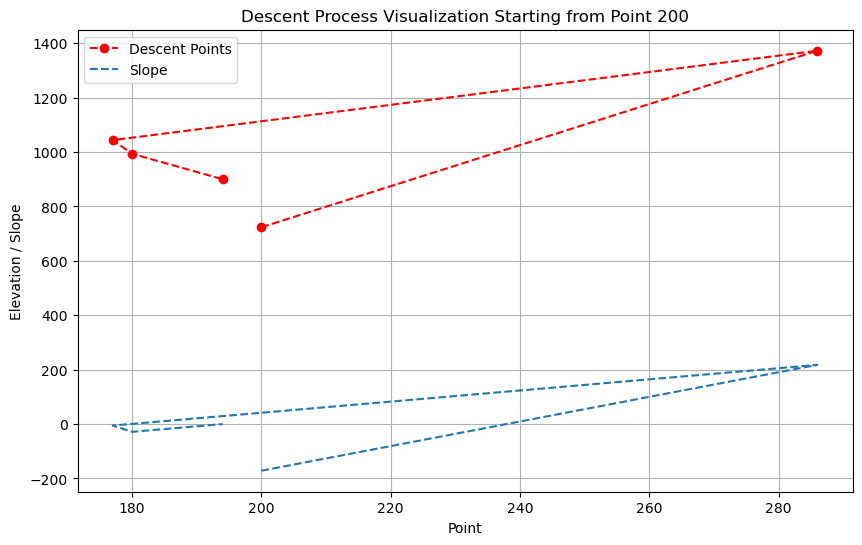

In [85]:
visualise_descent(200, alpha=0.5)